# Semantic Segmentation of Human Images 1/3 - Mask R-CNN Benchmark
### SCS_3546_007 Deep Learning - Prof. Sina Jamshidi - April 2019
### Bruno Schrappe - April 2020

In [33]:
# Set Jupyter cell size to a more reasonable width...
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [12]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

In [13]:
# This is the root directory: /Users/sto-ml090/ml/Deep Learning/Semantic Segmentation Project/Mask_RCNN
root_directory = os.path.abspath("../")

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
# Import Mask RCNN
sys.path.append(root_directory)  # To find local version of the library
import tensorflow
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(root_directory, "samples/coco/"))  # To find local version
import coco

%matplotlib inline

In [16]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(root_directory, "logs")

# Local path to trained weights file (under samples folder)
COCO_MODEL_PATH = os.path.join('', "mask_rcnn_coco.h5")

# Directory of images to run detection on
IMAGE_DIR = os.path.join(root_directory, "images")

### Coco Dataset: http://cocodataset.org/

In [17]:
# Inference class for the Mask R-CNN model
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
#config.display()

In [18]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir='mask_rcnn_coco.hy', config=config)

# Load weights trained on the MS-COCO dataset
model.load_weights('mask_rcnn_coco.h5', by_name=True)

In [19]:
# COCO Class names
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [43]:
# Function to plot individual instance masks
def plotMasks():
    mask = r['masks']
    mask = mask.astype(int)

    for i in range(mask.shape[2]):
        temp = skimage.io.imread(IMAGE_FILE)
        for j in range(temp.shape[2]):
            temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
        plt.figure(figsize=(8,8))
        plt.imshow(temp)

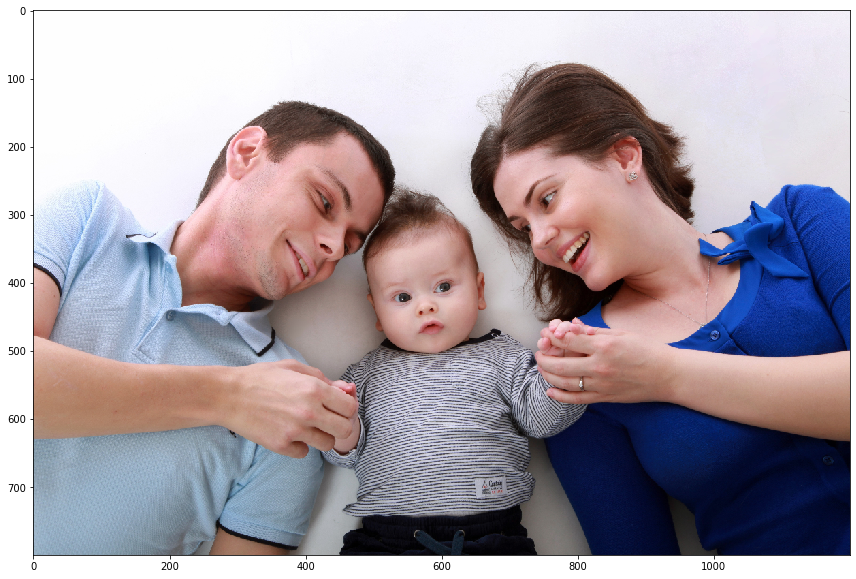

In [41]:
# Load a test image from the images folder
IMAGE_FILE = os.path.join(IMAGE_DIR, 'family-toddler.png')
image = skimage.io.imread(IMAGE_FILE)
# original image
plt.figure(figsize=(12,10))
skimage.io.imshow(image)

Processing 1 images
image                    shape: (800, 1200, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1200.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


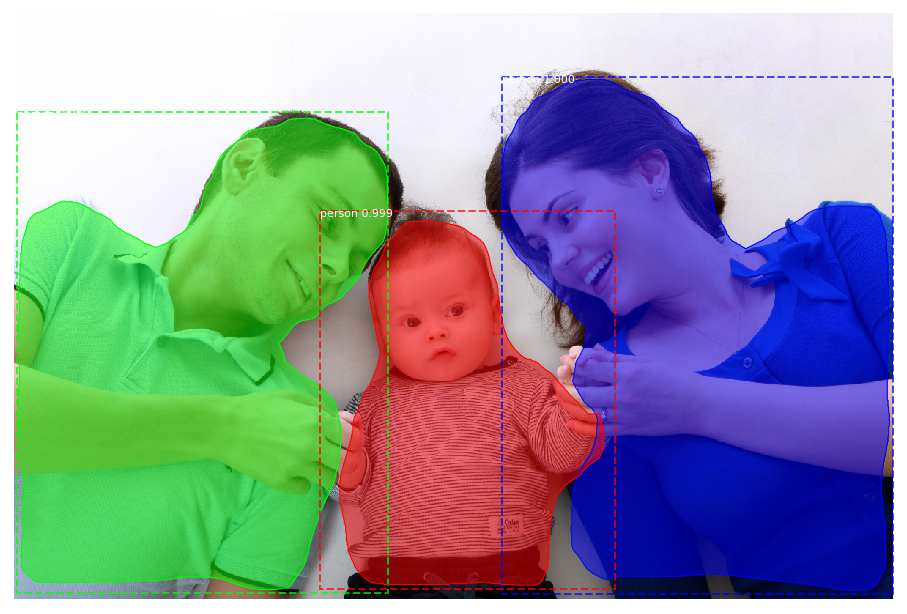

In [42]:

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

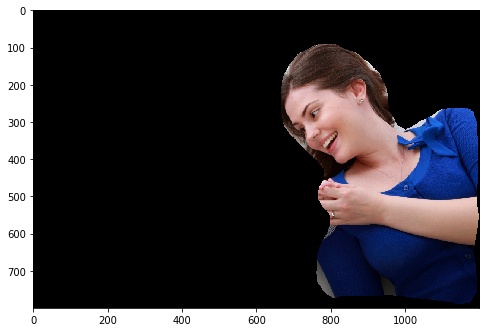

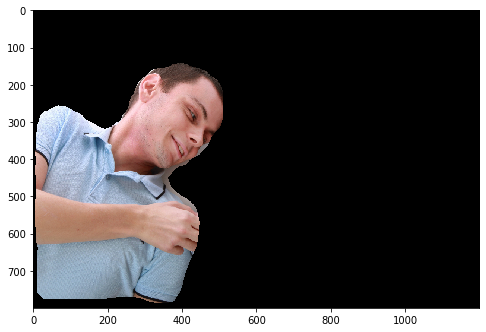

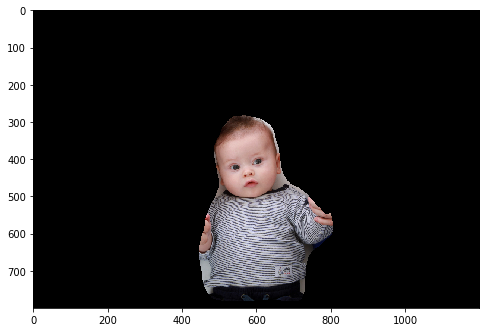

In [44]:
plotMasks()

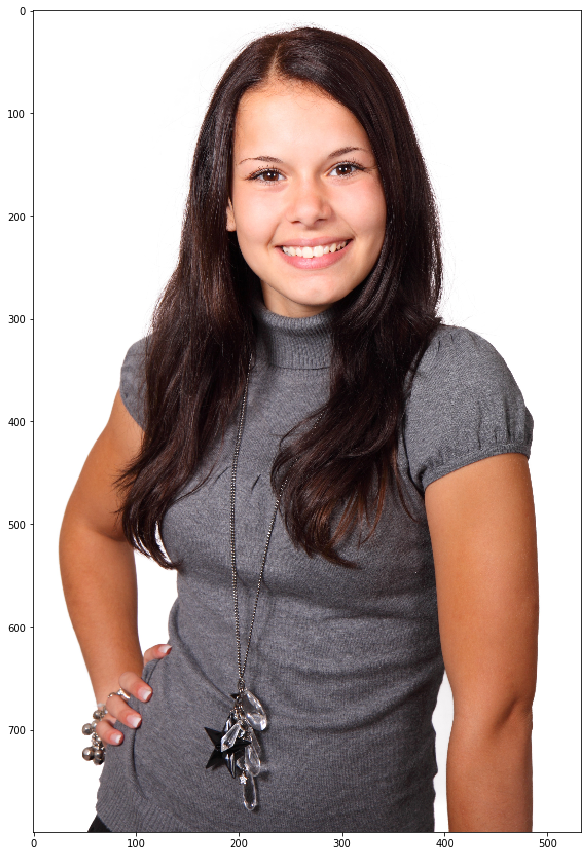

In [45]:
# Load a random image from the images folder
IMAGE_FILE = os.path.join(IMAGE_DIR, 'brunette-cute-fashion-female-41366.png')
#IMAGE_FILE = os.path.join(IMAGE_DIR, 'paul-bill.jpg')
image = skimage.io.imread(IMAGE_FILE)

# original image
plt.figure(figsize=(15,12))
skimage.io.imshow(image)

Processing 1 images
image                    shape: (800, 533, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


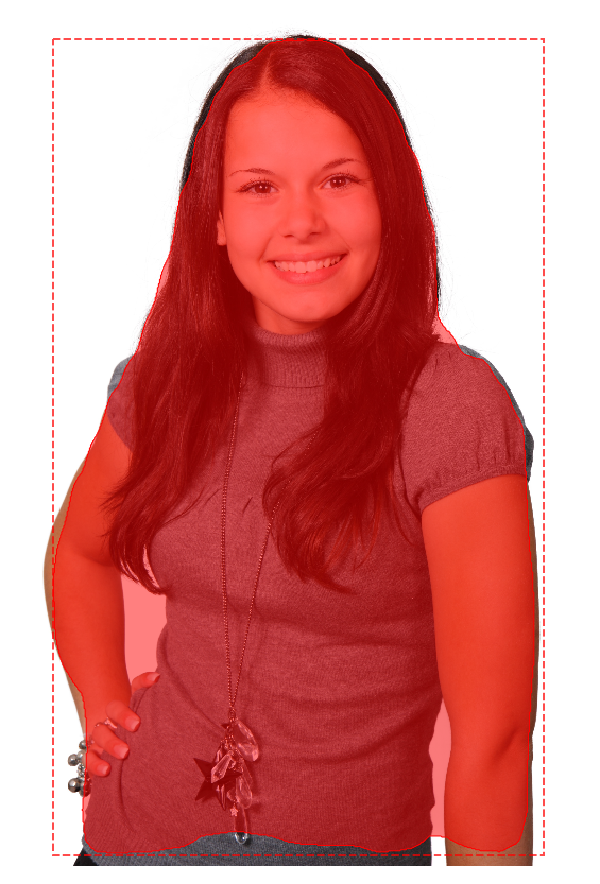

In [46]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

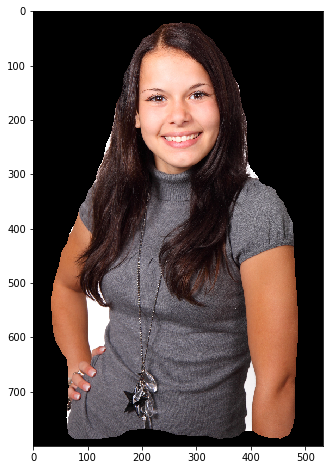

In [47]:
plotMasks()

## Issues with coco dataset include poor segmentation based on polygons
<br>
<div align="center">
<img src="coco-samples/coco-sample-1.png" alt="coco sample"/>
<center><b>Sample of a coco dataset image, showing segmentation as vector</b></center>
    <center><b><a href='http://cocodataset.org/#explore?id=240632'>Link to coco page</a></b></center>
    <img src="coco-samples/coco-sample-2.png" alt="coco sample"/>
<center><b>Sample of a coco dataset image, showing segmentation as vector</b></center>
    <img src="coco-samples/coco-sample-3.png" alt="coco sample"/>
<center><b>Sample of a coco dataset image, showing segmentation as vector</b></center>
</div>

## Using a better dataset from Supervisely
<br>
<div align="center">
<img src="supervisely-samples/bodybuilder-weight-training-stress-38630.png" alt="Supervisely sample"/>
<center><b>Sample of a Supervisely dataset image, showing finer segmentation as bitmap</b></center>
<img src="supervisely-samples/brunette-cute-fashion-female-41366.png" alt="Supervisely sample"/>
<center><b>Sample of a Supervisely dataset image, showing finer segmentation as bitmap</b></center>
 <img src="supervisely-samples/family-toddler-hapy-happy-160688.png" alt="Supervisely sample"/>
<center><b>Sample of a Supervisely dataset image, showing finer segmentation as bitmap</b></center>
</div>

## References
Understanding Semantic Segmentation with UNET:
https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47

Mask-RCNN and U-net Ensembled for Nuclei Segmentation: https://arxiv.org/abs/1901.10170

A Keras Pipeline for Image Segmentation: https://towardsdatascience.com/a-keras-pipeline-for-image-segmentation-part-1-6515a421157d

Background removal with deep learning: https://towardsdatascience.com/background-removal-with-deep-learning-c4f2104b3157

Releasing “Supervisely Person” dataset for teaching machines to segment humans: https://hackernoon.com/releasing-supervisely-person-dataset-for-teaching-machines-to-segment-humans-1f1fc1f28469

U-Net: Convolutional Networks for Biomedical Image Segmentation: https://arxiv.org/pdf/1505.04597.pdf

Coco Dataset: http://cocodataset.org/

Practical Image Segmentation with UNET: https://tuatini.me/practical-image-segmentation-with-unet/

